In [1]:
!pip install wordcloud

In [2]:
import pandas as pd

data = pd.read_csv('reviews.csv')
data = data.head(30000)

data.tail()

,Time_submitted,Review,Rating,Total_thumbsup,Reply
29995,2022-04-23 20:03:35,"When I play music on my playstation (4 and 5),...",3,0,NaN
29996,2022-04-23 19:51:42,Absolutely brilliant Playlists,5,0,NaN
29997,2022-04-23 19:49:46,what is this behavior spotify...??? every time...,1,0,NaN
29998,2022-04-23 19:45:41,Great interface and setup...,5,0,NaN
29999,2022-04-23 19:42:41,this app is so trash. it is impossible to do a...,1,4,NaN


In [3]:
data.isnull().sum()

Time_submitted        0
Review                0
Rating                0
Total_thumbsup        0
Reply             29927
dtype: int64

In [4]:
data.drop(['Time_submitted', 'Reply'], axis=1, inplace=True)
data.isnull().sum()

Review            0
Rating            0
Total_thumbsup    0
dtype: int64

<AxesSubplot:xlabel='Rating', ylabel='count'>

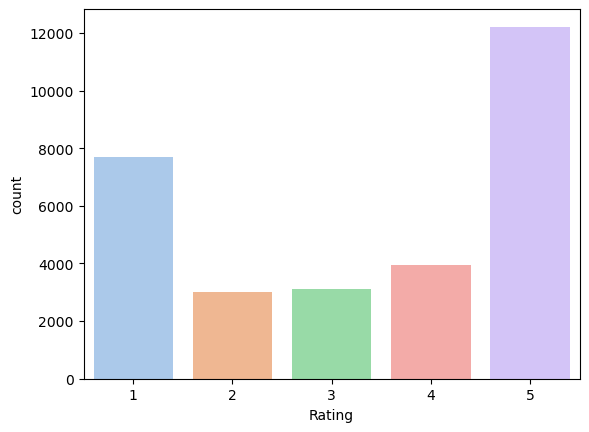

In [5]:
import seaborn as sns
sns.countplot(x='Rating', data=data, palette='pastel')

In [6]:
def transform_ratings(rating):
    if rating == 5 or rating == 4:
        return "Good"
    if rating == 3:
        return "Neutral"
    if rating == 2 or rating == 1:
        return "Bad"

,Review,Rating,Total_thumbsup,Desc,length
0,"Great music service, the audio is high quality...",5,2,Good,112
1,Please ignore previous negative rating. This a...,5,1,Good,86
2,"This pop-up ""Get the best Spotify experience o...",4,0,Good,106
3,Really buggy and terrible to use as of recently,1,1,Bad,47
4,Dear Spotify ... why do I get songs that I di...,1,1,Bad,105


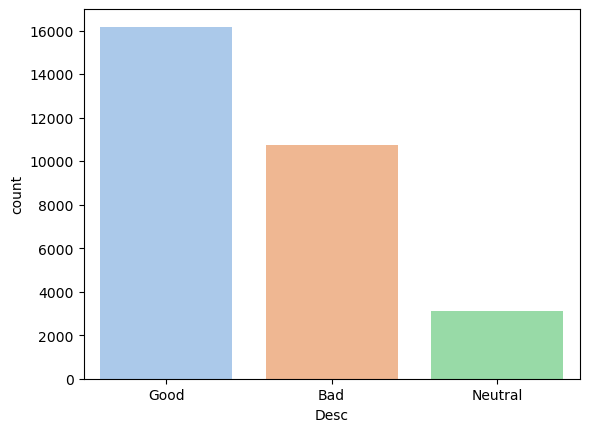

In [7]:
# Create a new column ‘Desc’ by transforming the Rating into a character shape
data['Desc'] = data['Rating'].apply(transform_ratings)

# Create a new column ‘length’ filled with the number of words in the Review column
data['length'] = data['Review'].str.len()

sns.countplot(x='Desc', data=data, palette='pastel')
data.head()

<AxesSubplot:xlabel='length', ylabel='Total_thumbsup'>

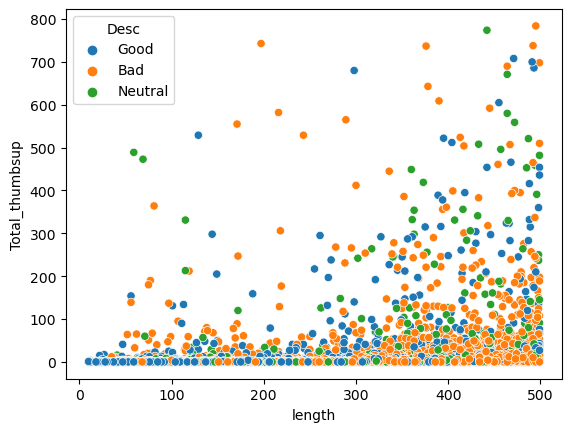

In [8]:
sns.scatterplot(x=data['length'][data.length < 500], y=data['Total_thumbsup'][data.Total_thumbsup < 800], hue=data['Desc'])

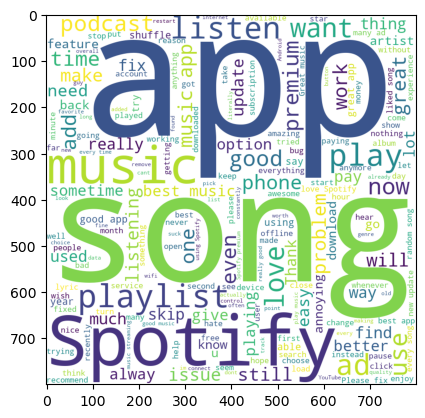

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

reviews = " ".join(data.loc[:,'Review'])

# Create a wordcloud based on all the rows in the “Review” column
wordcloud = WordCloud(
    width = 800, height = 800,
    background_color ='white',
    min_font_size = 10
).generate(reviews)

plt.imshow(wordcloud)

In [10]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Change all words into lowercase/small letter
data.loc[:,'Review'] = data.loc[:,'Review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Remove characters that are not included in alphanumeric (remove special characters)
data.loc[:,'Review'] = data.loc[:,'Review'].apply(lambda word: re.sub('[^a-z A-Z 0-9-]+', '', word))

# Remove stopwords
stop_words = stopwords.words('english')
data.loc[:,'Review'] = data.loc[:,'Review'].apply(lambda word: " ".join(word for word in word.split() if word not in stop_words))

# Do stemming process in ‘Review’ column
stemmer = PorterStemmer()
data.loc[:,'Review'] = data.loc[:,'Review'].apply(lambda 
word:" ".join(stemmer.stem(word) for word in word.split()))

data.head()["Review"]

0    great music servic audio high qualiti app easi...
1    pleas ignor previou neg rate app super great g...
2    pop-up get best spotifi experi android 12 anno...
3                      realli buggi terribl use recent
4    dear spotifi get song didnt put playlist shuff...
Name: Review, dtype: object

In [11]:
from sklearn.model_selection import train_test_split

X = data['Review']
y = data['Desc']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((22500,), (7500,), (22500,), (7500,))

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(y_train)

y_train = le.transform(y_train)
y_test = le.transform(y_test)

y_train

array([1, 1, 1, ..., 1, 1, 0])

In [13]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv = CountVectorizer()

# fit() used for learning vocabulary and searching unique words in the text
cv.fit(X_train)

# transform() used to convert words into numerical format
X_train_count = cv.transform(X_train)
X_test_count = cv.transform(X_test)

print(X_train_count)

  (0, 3238)	1
  (0, 3300)	2
  (0, 3915)	1
  (0, 5312)	1
  (0, 5667)	1
  (0, 5770)	1
  (0, 5771)	1
  (0, 8339)	1
  (0, 9393)	1
  (0, 9775)	1
  (0, 9847)	1
  (1, 795)	1
  (1, 1131)	1
  (1, 3698)	1
  (1, 4171)	1
  (1, 4487)	1
  (1, 5098)	1
  (1, 7952)	1
  (1, 11212)	1
  (2, 668)	1
  (2, 2147)	1
  (2, 3861)	1
  (2, 4517)	1
  (2, 5187)	1
  (2, 5412)	1
  :	:
  (22497, 6871)	1
  (22497, 7674)	2
  (22497, 7708)	1
  (22497, 8502)	1
  (22497, 8997)	1
  (22497, 9127)	1
  (22497, 9393)	3
  (22497, 9923)	1
  (22497, 10305)	1
  (22497, 10874)	1
  (22497, 11454)	1
  (22498, 3270)	1
  (22498, 3544)	1
  (22498, 4590)	1
  (22498, 5418)	1
  (22498, 7229)	1
  (22498, 8197)	1
  (22498, 9256)	1
  (22498, 10339)	1
  (22499, 1464)	1
  (22499, 2143)	1
  (22499, 4427)	1
  (22499, 5372)	1
  (22499, 6567)	1
  (22499, 7133)	1


In [14]:
tfidf = TfidfVectorizer(analyzer='char', ngram_range=(2,3))
tfidf.fit(X_train)

X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print(X_train_tfidf)

  (0, 9801)	0.1611680812424819
  (0, 9793)	0.15612197572933384
  (0, 9181)	0.09940095961304855
  (0, 9173)	0.07384292539111476
  (0, 9042)	0.12832673998126956
  (0, 9038)	0.06500640010175625
  (0, 8901)	0.0828600504737942
  (0, 8887)	0.03707729609945748
  (0, 8838)	0.11074853174017249
  (0, 8837)	0.06437317767121703
  (0, 8819)	0.08470155033089796
  (0, 8732)	0.05201377505308044
  (0, 8725)	0.060454261060461735
  (0, 8722)	0.0815413378680683
  (0, 8717)	0.07494175939929815
  (0, 8702)	0.10488867037127933
  (0, 8647)	0.09583967634662735
  (0, 8638)	0.08187599203306832
  (0, 8634)	0.055266156722047675
  (0, 8628)	0.04176657008898285
  (0, 8627)	0.12387021861371503
  (0, 8568)	0.042604713437173466
  (0, 8554)	0.03694541749374239
  (0, 8551)	0.07787888654926492
  (0, 8541)	0.07689791531386064
  :	:
  (22499, 4586)	0.10222268078880288
  (22499, 4117)	0.09649595741543592
  (22499, 4116)	0.08000342331319464
  (22499, 3362)	0.14399192796656132
  (22499, 3348)	0.057197384773171274
  (22499, 309

In [15]:
from sklearn.ensemble import RandomForestClassifier

rf1 = RandomForestClassifier()
rf1.fit(X_train_count, y_train)

#The model takes review data that has been vectorized using the Count Vectorizer (X) and Desc (Y)
rf_cv = rf1.score(X_test_count, y_test) #model accuracy test

print(f'Random Forest Classifier on Count Vectors: {rf_cv}')

Random Forest Classifier on Count Vectors: 0.7741333333333333


In [16]:
rf2 = RandomForestClassifier()
rf2.fit(X_train_tfidf, y_train)
rf_tfidf = rf2.score(X_test_tfidf, y_test)

print(f'Random Forest Classifier on TF-IDF: {rf_tfidf}')

Random Forest Classifier on TF-IDF: 0.7569333333333333


In [17]:
from sklearn.naive_bayes import MultinomialNB

mnb1 = MultinomialNB()
mnb1.fit(X_train_count, y_train)
mnb_cv = mnb1.score(X_test_count, y_test)

print(f'M Naive Bayes Classifier on CV: {mnb_cv}')

M Naive Bayes Classifier on CV: 0.7758666666666667


In [18]:
mnb2 = MultinomialNB()
mnb2.fit(X_train_tfidf, y_train)
mnb_tfidf = mnb2.score(X_test_tfidf, y_test)

print(f'M Naive Bayes Classifier on TF-IDF: {mnb_tfidf}')

M Naive Bayes Classifier on TF-IDF: 0.7593333333333333


In [19]:
model = {
    'Model':['RF-Count', 'RF-TFIDF', 'MNB-Count','MNB-TFIDF'],
    'Score':[rf_cv, rf_tfidf, mnb_cv, mnb_tfidf]
}

model_df = pd.DataFrame(model)
model_df

,Model,Score
0,RF-Count,0.774133
1,RF-TFIDF,0.756933
2,MNB-Count,0.775867
3,MNB-TFIDF,0.759333


<AxesSubplot:xlabel='Score', ylabel='Model'>

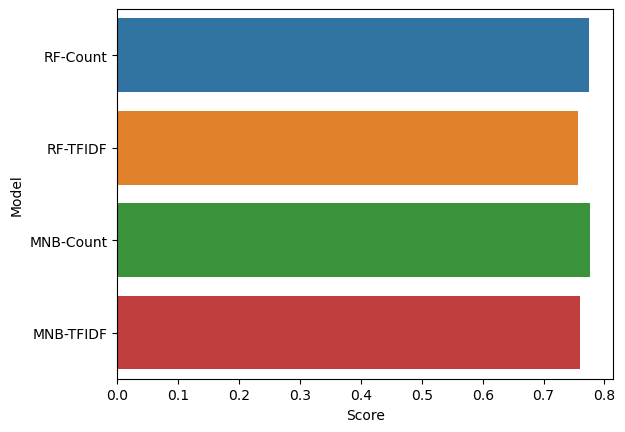

In [20]:
sns.barplot(data=model_df, y='Model', x='Score')

Text(0.5, 1.0, 'Confusion Matrix M NaiveBayes-Count')

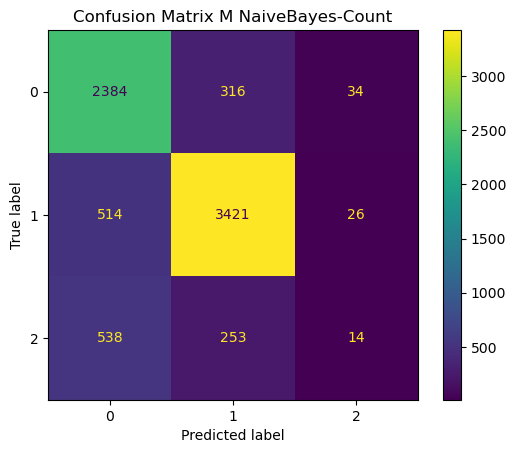

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_estimator(mnb1, X_test_count, y_test)
disp.ax_.set_title("Confusion Matrix M NaiveBayes-Count")

In [22]:
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(mnb1, f) #Naive Bayes Model with Count Vectorization
with open('transformer.pkl', 'wb') as f:
    pickle.dump(cv, f)#Count Vectorizer
with open('le.pkl', 'wb') as f:
    pickle.dump(le, f )#Label Encoder

In [23]:
test_reviews = [
    'This is a great app!',
    'No control options from my phones ',
    'I like the song selection, but the ads are annoying',
    'bad ui'
]

pred = mnb1.predict(cv.transform(test_reviews))
pred_transformed = le.inverse_transform(pred).tolist()

In [24]:
result = pd.DataFrame({'Reviews':test_reviews, 'Outcome':pred_transformed})
result

,Reviews,Outcome
0,This is a great app!,Good
1,No control options from my phones,Bad
2,"I like the song selection, but the ads are ann...",Neutral
3,bad ui,Bad


<AxesSubplot:xlabel='Outcome', ylabel='count'>

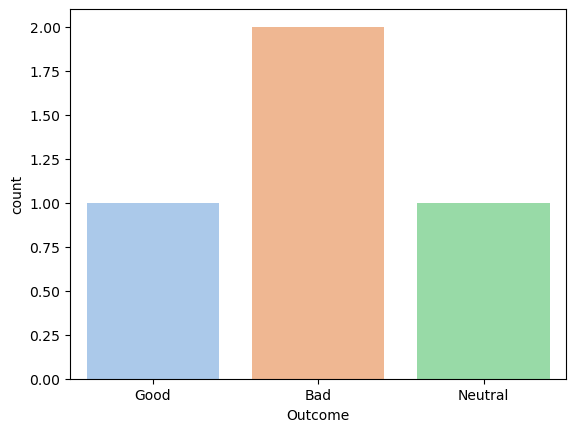

In [25]:
sns.countplot(x='Outcome', data=result, palette='pastel')